In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import sklearn
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn import linear_model
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

c:\users\edgor\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.csv')

In [3]:
df.columns = ['city','population','violent_crime','murder','rape_revised','rape_legacy','robbery','aggravated_assault','property_crime','burglary','larceny_theft','vehicle_theft','arson', '?']
df.drop(labels= [0,1,2,3, 353,353,354], axis = 0, inplace = True)
df.head()

,city,population,violent_crime,murder,rape_revised,rape_legacy,robbery,aggravated_assault,property_crime,burglary,larceny_theft,vehicle_theft,arson,?
4,Adams Village,"1,861",0,0,NaN,0,0,0,12,2,10,0,0,NaN
5,Addison Town and Village,"2,577",3,0,NaN,0,0,3,24,3,20,1,0,NaN
6,Akron Village,"2,846",3,0,NaN,0,0,3,16,1,15,0,0,NaN
7,Albany,"97,956",791,8,NaN,30,227,526,"4,090",705,"3,243",142,NaN,NaN
8,Albion Village,"6,388",23,0,NaN,3,4,16,223,53,165,5,NaN,NaN


In [4]:
df = df[['population','violent_crime','murder', 'rape_legacy','property_crime','robbery', 'aggravated_assault','burglary', 'larceny_theft', 'vehicle_theft']]
columns = list(df.columns)
for column in columns:
    df[column] = df[column].str.replace(',', '')
    
df.dropna()

,population,violent_crime,murder,rape_legacy,property_crime,robbery,aggravated_assault,burglary,larceny_theft,vehicle_theft
4,1861,0,0,0,12,0,0,2,10,0
5,2577,3,0,0,24,0,3,3,20,1
6,2846,3,0,0,16,0,3,1,15,0
7,97956,791,8,30,4090,227,526,705,3243,142
8,6388,23,0,3,223,4,16,53,165,5
9,4089,5,0,0,46,3,2,10,36,0
10,1781,3,0,0,10,0,3,0,10,0
11,118296,107,1,7,2118,31,68,204,1882,32
12,9519,9,0,2,210,4,3,16,188,6
13,18182,30,0,0,405,12,18,99,291,15


In [5]:
df = df.apply(pd.to_numeric)

In [6]:
df.describe()

,population,violent_crime,murder,rape_legacy,property_crime,robbery,aggravated_assault,burglary,larceny_theft,vehicle_theft
count,3.480000e+02,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,4.003763e+04,201.594828,1.566092,5.864943,792.606322,72.902299,121.261494,119.683908,637.017241,35.905172
std,4.500374e+05,2815.268504,18.303673,60.425452,7659.724746,1031.032873,1706.131730,924.948789,6346.054451,403.423826
min,5.260000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.003000e+03,2.000000,0.000000,0.000000,40.500000,0.000000,1.000000,6.000000,31.000000,0.000000
50%,7.233500e+03,6.000000,0.000000,0.000000,112.500000,1.000000,4.000000,17.500000,94.000000,2.000000
75%,1.842750e+04,22.000000,0.000000,2.000000,341.000000,5.000000,14.000000,51.250000,287.250000,7.000000
max,8.396126e+06,52384.000000,335.000000,1112.000000,141971.000000,19170.000000,31767.000000,16606.000000,117931.000000,7434.000000


c:\users\edgor\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


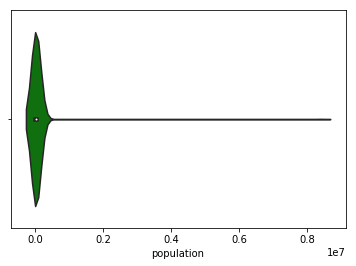

In [7]:
population = sns.violinplot(df['population'], color = 'g')

In [8]:
q25 = df['population'].quantile(0.25)
q75 = df['population'].quantile(0.75)
iqr = q75 - q25
maximum = q75 + (iqr * 1.5)
df = df.where(df['population']< maximum)

c:\users\edgor\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


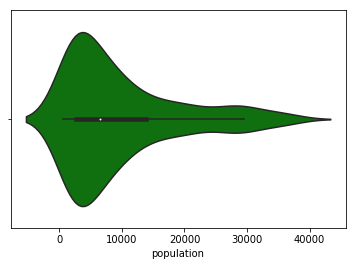

In [9]:
population = sns.violinplot(df['population'], color = 'g')

In [10]:
df = df.replace([np.inf, -np.inf], np.nan).dropna(how="all")

## Linear Regression

In [11]:
y = df['property_crime']
X = df[['population','violent_crime','murder', 'rape_legacy','robbery', 'burglary', 'larceny_theft', 'vehicle_theft']]
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [12]:
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

print('\nCoefficients: \n', lr.coef_)
print('\nIntercept: \n', lr.intercept_)
print('\nR-Squared: \n' , lr.score(X_train, y_train))


Coefficients: 
 [ 3.15366510e-18 -4.44089210e-15 -1.35633692e-15 -1.02123171e-14
  6.71684930e-15  1.00000000e+00  1.00000000e+00  1.00000000e+00]

Intercept: 
 5.684341886080802e-14

R-Squared: 
 1.0


In [13]:
crime = pd.concat([X_train, y_train], axis=1)
lf = 'property_crime ~  burglary + larceny_theft + murder + population + rape_legacy + robbery + vehicle_theft + violent_crime'
lm = smf.ols(formula=lf, data=crime).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:         property_crime   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.684e+28
Date:                Fri, 19 Oct 2018   Prob (F-statistic):               0.00
Time:                        10:23:27   Log-Likelihood:                 5812.4
No. Observations:                 238   AIC:                        -1.161e+04
Df Residuals:                     229   BIC:                        -1.158e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.743e-12   5.98e-13      7.934

In [14]:
#drop rape_legacy, robbery, murder, and violent crime due to high p values.
y = df['property_crime']
X = df[['population', 'burglary', 'larceny_theft', 'vehicle_theft']]
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [15]:
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

print('\nCoefficients: \n', lr.coef_)
print('\nIntercept: \n', lr.intercept_)
print('\nR-Squared: \n' , lr.score(X_train, y_train))


Coefficients: 
 [4.88457592e-17 1.00000000e+00 1.00000000e+00 1.00000000e+00]

Intercept: 
 -4.547473508864641e-13

R-Squared: 
 1.0


In [16]:
crime = pd.concat([X_train, y_train], axis=1)
lf = 'property_crime ~  burglary + larceny_theft + population + vehicle_theft '
lm = smf.ols(formula=lf, data=crime).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:         property_crime   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.687e+29
Date:                Fri, 19 Oct 2018   Prob (F-statistic):               0.00
Time:                        10:23:28   Log-Likelihood:                 5961.2
No. Observations:                 238   AIC:                        -1.191e+04
Df Residuals:                     233   BIC:                        -1.190e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.292e-12   3.02e-13     -7.585

## Assumptions

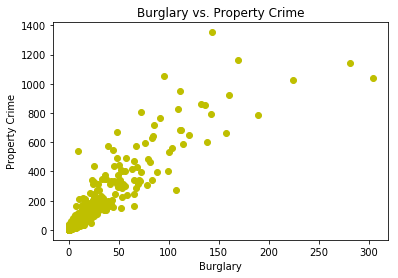

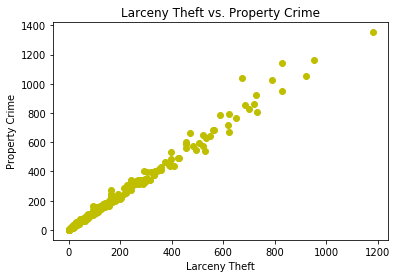

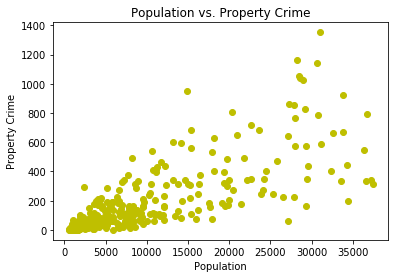

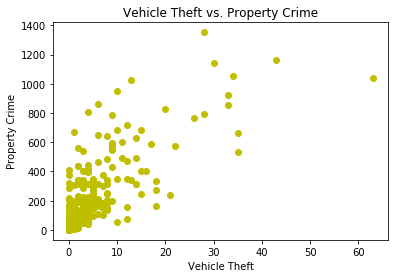

In [17]:
#Linear Relationship
plt.scatter(y = df['property_crime'], x =df['burglary'], c ='y')
plt.ylabel('Property Crime')
plt.xlabel('Burglary')
plt.title('Burglary vs. Property Crime')
plt.show()

plt.scatter(y = df['property_crime'], x =df['larceny_theft'], c ='y')
plt.ylabel('Property Crime')
plt.xlabel('Larceny Theft')
plt.title('Larceny Theft vs. Property Crime')
plt.show()

plt.scatter(y = df['property_crime'], x =df['population'], c ='y')
plt.ylabel('Property Crime')
plt.xlabel('Population')
plt.title('Population vs. Property Crime')
plt.show()

plt.scatter(y = df['property_crime'], x =df['vehicle_theft'], c ='y')
plt.ylabel('Property Crime')
plt.xlabel('Vehicle Theft')
plt.title('Vehicle Theft vs. Property Crime')
plt.show()

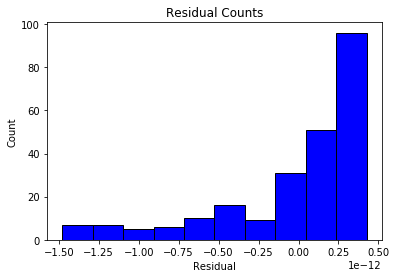

In [18]:
#Multivariate Normality
predicted = lr.predict(X_train).ravel()
actual = y_train
residual = actual - predicted

plt.hist(residual, color='b', edgecolor='k')
plt.title('Residual Counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

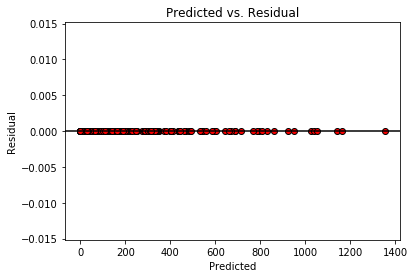

In [19]:
#Homoscedasticity
plt.scatter(predicted, residual,color='r', edgecolor='k')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.title( 'Predicted vs. Residual')
plt.axhline(y=0,c='k')
plt.show()

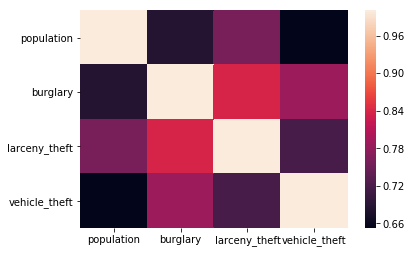

In [20]:
#Low Multicollinearity
correlation_matrix = X_train.corr()
sns.heatmap(correlation_matrix)

In [21]:
#We will combine burglary, larceny theft, and vehicle theft due to high correlation between these features.
avgs = df[['burglary','larceny_theft','vehicle_theft']].mean(axis=0)
stds = df[['burglary','larceny_theft','vehicle_theft']].std(axis=0)
df['theft'] = ((df[['burglary','larceny_theft','vehicle_theft']] - avgs) / stds).mean(axis=1)

In [22]:
y = df['property_crime']
X = df[['population','theft']]
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [23]:
#This model has a better r-squared value than the previous model.
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

print('\nCoefficients: \n', lr.coef_)
print('\nIntercept: \n', lr.intercept_)
print('\nR-Squared:')
print(lr.score(X_train, y_train))


Coefficients: 
 [8.21906119e-04 2.53916075e+02]

Intercept: 
 186.07136718330605

R-Squared:
0.9377952000657233


## Rechecking Assumptions

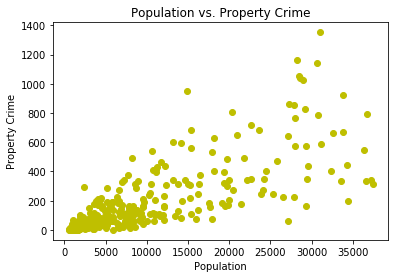

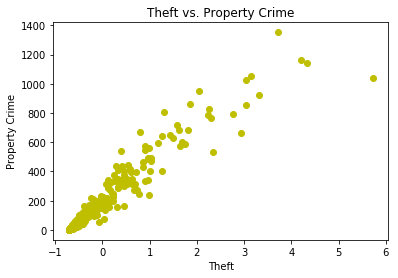

In [24]:
plt.scatter(y = df['property_crime'], x =df['population'], c ='y')
plt.ylabel('Property Crime')
plt.xlabel('Population')
plt.title('Population vs. Property Crime')
plt.show()

plt.scatter(y = df['property_crime'], x =df['theft'], c ='y')
plt.ylabel('Property Crime')
plt.xlabel('Theft')
plt.title('Theft vs. Property Crime')
plt.show()


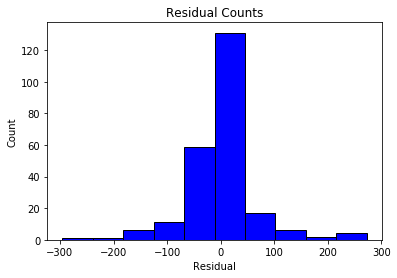

In [25]:
predicted = lr.predict(X_train).ravel()
actual = y_train
residual = actual - predicted

plt.hist(residual, color='b', edgecolor='k')
plt.title('Residual Counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

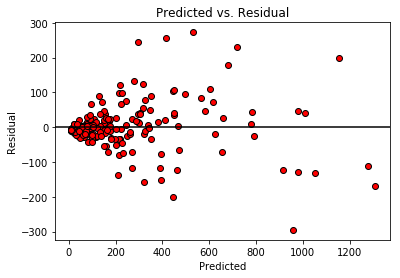

In [26]:
plt.scatter(predicted, residual,color='r', edgecolor='k')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.title( 'Predicted vs. Residual')
plt.axhline(y=0,c='k')
plt.show()

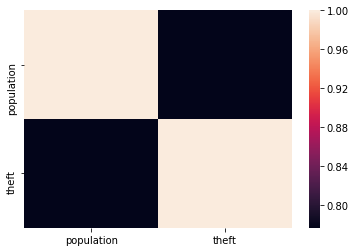

In [27]:
correlation_matrix = X_train.corr()
sns.heatmap(correlation_matrix)

In [57]:
lr = linear_model.LinearRegression()
scores = cross_val_score(lr, X_test, y_test, cv=5, scoring = 'explained_variance')
print("Explained Variance Scores: {}.".format(scores))
print("Coefficient of Determination: {:.2f} +/- {:.2f}%.".format(scores.mean()*100, scores.std() * 200))

Explained Variance Scores: [0.81754223 0.80569452 0.81714234 0.91527301 0.85766688].
Coefficient of Determination: 84.27 +/- 8.07%.


## KNN Regression

In [58]:
z_scaler = StandardScaler()
X = z_scaler.fit_transform(df[['population', 'theft']])

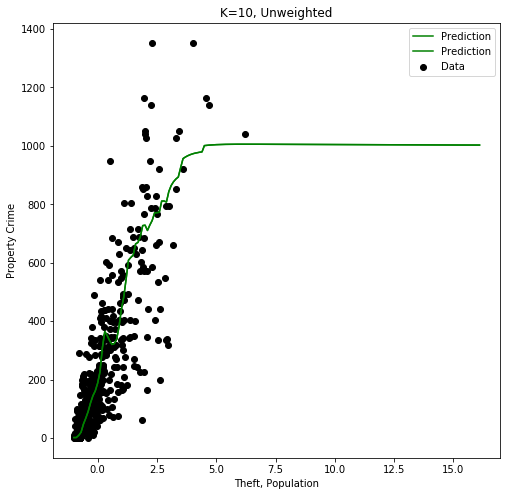

Unweighted Accuracy: 90.91% +/- 1.88%.


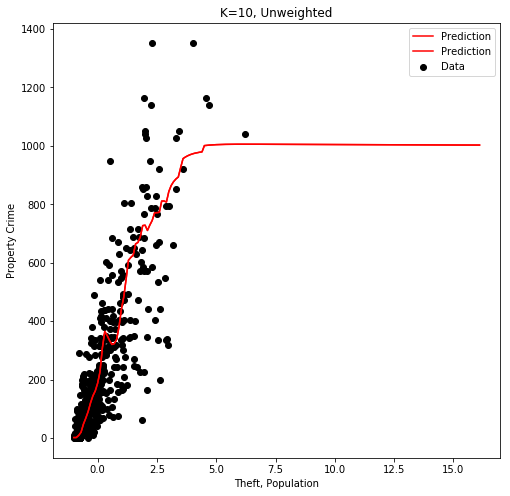

Weighted Accuracy: 91.63 +/- 1.03%.


In [65]:
# k=10 and unweighted
knn1 = neighbors.KNeighborsRegressor(n_neighbors=10)
y = np.column_stack([df['property_crime'],df['property_crime']])
X = z_scaler.fit_transform(df[['population', 'theft']])
knn.fit(X,y)

T_x1 = np.arange(-1, 16.2, .1)[:, np.newaxis]
T_x2 = np.arange(-1, 16.2, .1)[:, np.newaxis]
T = np.column_stack([T_x1, T_x2])
Y_ = knn.predict(T)

plt.figure(figsize=(8,8))
plt.scatter(X, y, color ='k', label='Data')
plt.plot(T, Y_, color ='g', label='Prediction')
plt.legend()
plt.ylabel('Property Crime')
plt.xlabel('Theft, Population')
plt.title('K=10, Unweighted')
plt.show()

score1 = cross_val_score(knn1, X, y, cv=5)
print("Unweighted Accuracy: {:.2f}% +/- {:.2f}%.".format(score1.mean()*100, score1.std() * 200))


# k=10 and weighted
knn2= neighbors.KNeighborsRegressor(n_neighbors=10, weights = 'distance')
y = np.column_stack([df['property_crime'],df['property_crime']])
X = z_scaler.fit_transform(df[['population', 'theft']])
knn.fit(X,y)

T_x1 = np.arange(-1, 16.2, .1)[:, np.newaxis]
T_x2 = np.arange(-1, 16.2, .1)[:, np.newaxis]
T = np.column_stack([T_x1, T_x2])
Y_ = knn.predict(T)

plt.figure(figsize=(8,8))
plt.scatter(X, y, color ='k', label='Data')
plt.plot(T, Y_, color ='r', label='Prediction')
plt.legend()
plt.ylabel('Property Crime')
plt.xlabel('Theft, Population')
plt.title('K=10, Unweighted')
plt.show()

score2 = cross_val_score(knn2, X, y, cv=5)
print("Weighted Accuracy: {:.2f} +/- {:.2f}%.".format(score2.mean()*100, score2.std() * 200))

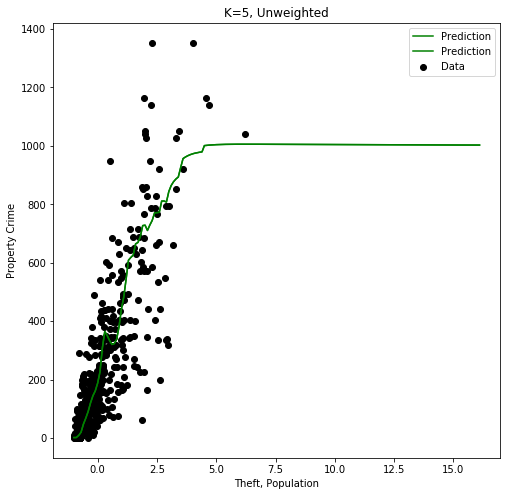

Unweighted Accuracy: 91.19 +/- 1.44%.


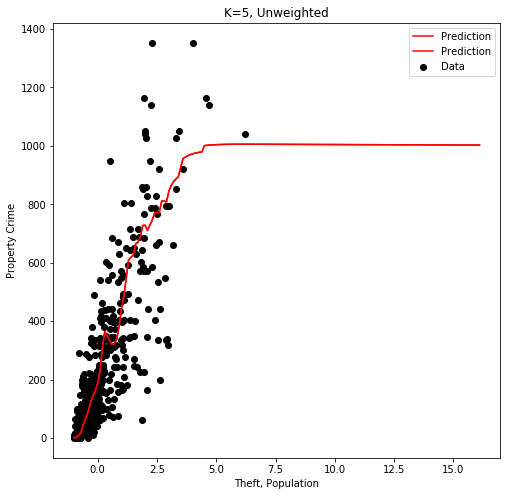

Weighted Accuracy: 91.40 +/- 1.77%.


In [66]:
# k=5 and unweighted
knn1 = neighbors.KNeighborsRegressor(n_neighbors=5)
y = np.column_stack([df['property_crime'],df['property_crime']])
X = z_scaler.fit_transform(df[['population', 'theft']])
knn.fit(X,y)

T_x1 = np.arange(-1, 16.2, .1)[:, np.newaxis]
T_x2 = np.arange(-1, 16.2, .1)[:, np.newaxis]
T = np.column_stack([T_x1, T_x2])
Y_ = knn.predict(T)

plt.figure(figsize=(8,8))
plt.scatter(X, y, color ='k', label='Data')
plt.plot(T, Y_, color ='g', label='Prediction')
plt.legend()
plt.ylabel('Property Crime')
plt.xlabel('Theft, Population')
plt.title('K=5, Unweighted')
plt.show()

score1 = cross_val_score(knn1, X, y, cv=5)
print("Unweighted Accuracy: {:.2f} +/- {:.2f}%.".format(score1.mean()*100, score1.std() * 200))

# k=5 and weighted
knn2 = neighbors.KNeighborsRegressor(n_neighbors=5, weights = 'distance')
y = np.column_stack([df['property_crime'],df['property_crime']])
X = z_scaler.fit_transform(df[['population', 'theft']])
knn.fit(X,y)

T_x1 = np.arange(-1, 16.2, .1)[:, np.newaxis]
T_x2 = np.arange(-1, 16.2, .1)[:, np.newaxis]
T = np.column_stack([T_x1, T_x2])
Y_ = knn.predict(T)

plt.figure(figsize=(8,8))
plt.scatter(X, y, color ='k', label='Data')
plt.plot(T, Y_, color ='r', label='Prediction')
plt.legend()
plt.ylabel('Property Crime')
plt.xlabel('Theft, Population')
plt.title('K=5, Unweighted')
plt.show()
score2 = cross_val_score(knn2, X, y, cv=5)
print("Weighted Accuracy: {:.2f} +/- {:.2f}%.".format(score2.mean()*100, score2.std() * 200))

Comparing the Linear Regression and KNN models, we see that we get a higher accuracy percentage with the KNN regression model. Between the two KNN regression models, I got a higher accuracy when I used a k value of 5. The weighted KNN regression model has a higher accuracy score than the unweighted model, but it also has a higher variance. I prefer to use KNN over linear regression because it allows us to predict more accurately and makes less assumptions of the data compared to linear regression.